# DSA RL Configuration Metrics Analysis - Visualize What the Agent Sees

This notebook lets you **visualize** how different configuration parameters affect the training images - so you can see exactly what the agent sees during training.

## 🎯 Key Visualizations:
1. **Training Stages View** - See images at each curriculum stage
2. **Parameter Effects** - How width, noise, curvature affect images
3. **Special Effects** - Branches, width/intensity variations
4. **Config Grids** - Multi-parameter combinations
5. **Custom Config Tester** - Test any parameter combination interactively


## Step 1: Setup and Installation


In [4]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import json
import warnings
warnings.filterwarnings('ignore')
print("✅ Setup complete!")


✅ Setup complete!


## Step 2: Load Config and Curve Generator


In [5]:
# Navigate to Experiment1 folder (already in repo)
%cd Experiment1

# Add src to path
import sys
sys.path.append('src')

# Import the curve generator
from curve_generator import CurveMakerFlexible, load_curve_config

# Load the default configuration
config, config_path = load_curve_config()
print(f"✅ Loaded config from: {config_path}")

# Create curve generator instance
img_cfg = config.get('image', {})
h = img_cfg.get('height', 128)
w = img_cfg.get('width', 128)
curve_maker = CurveMakerFlexible(h=h, w=w, config=config)

print(f"✅ Image dimensions: {h}x{w}")
print(f"✅ Found {len(config.get('training_stages', []))} training stages")


[Errno 2] No such file or directory: 'Experiment1'
/Users/geshvad/Documents/GitHub/DSA-RL-Tracker/Experiment1
✓ Loaded curve configuration from: /Users/geshvad/Documents/GitHub/DSA-RL-Tracker/Experiment1/config/curve_config.json
✅ Loaded config from: /Users/geshvad/Documents/GitHub/DSA-RL-Tracker/Experiment1/config/curve_config.json
✅ Image dimensions: 128x128
✅ Found 3 training stages


## 🎯 Step 3: TRAINING STAGES - What the Agent Sees at Each Stage

This is the most important visualization! See exactly what images the agent sees during each training stage.


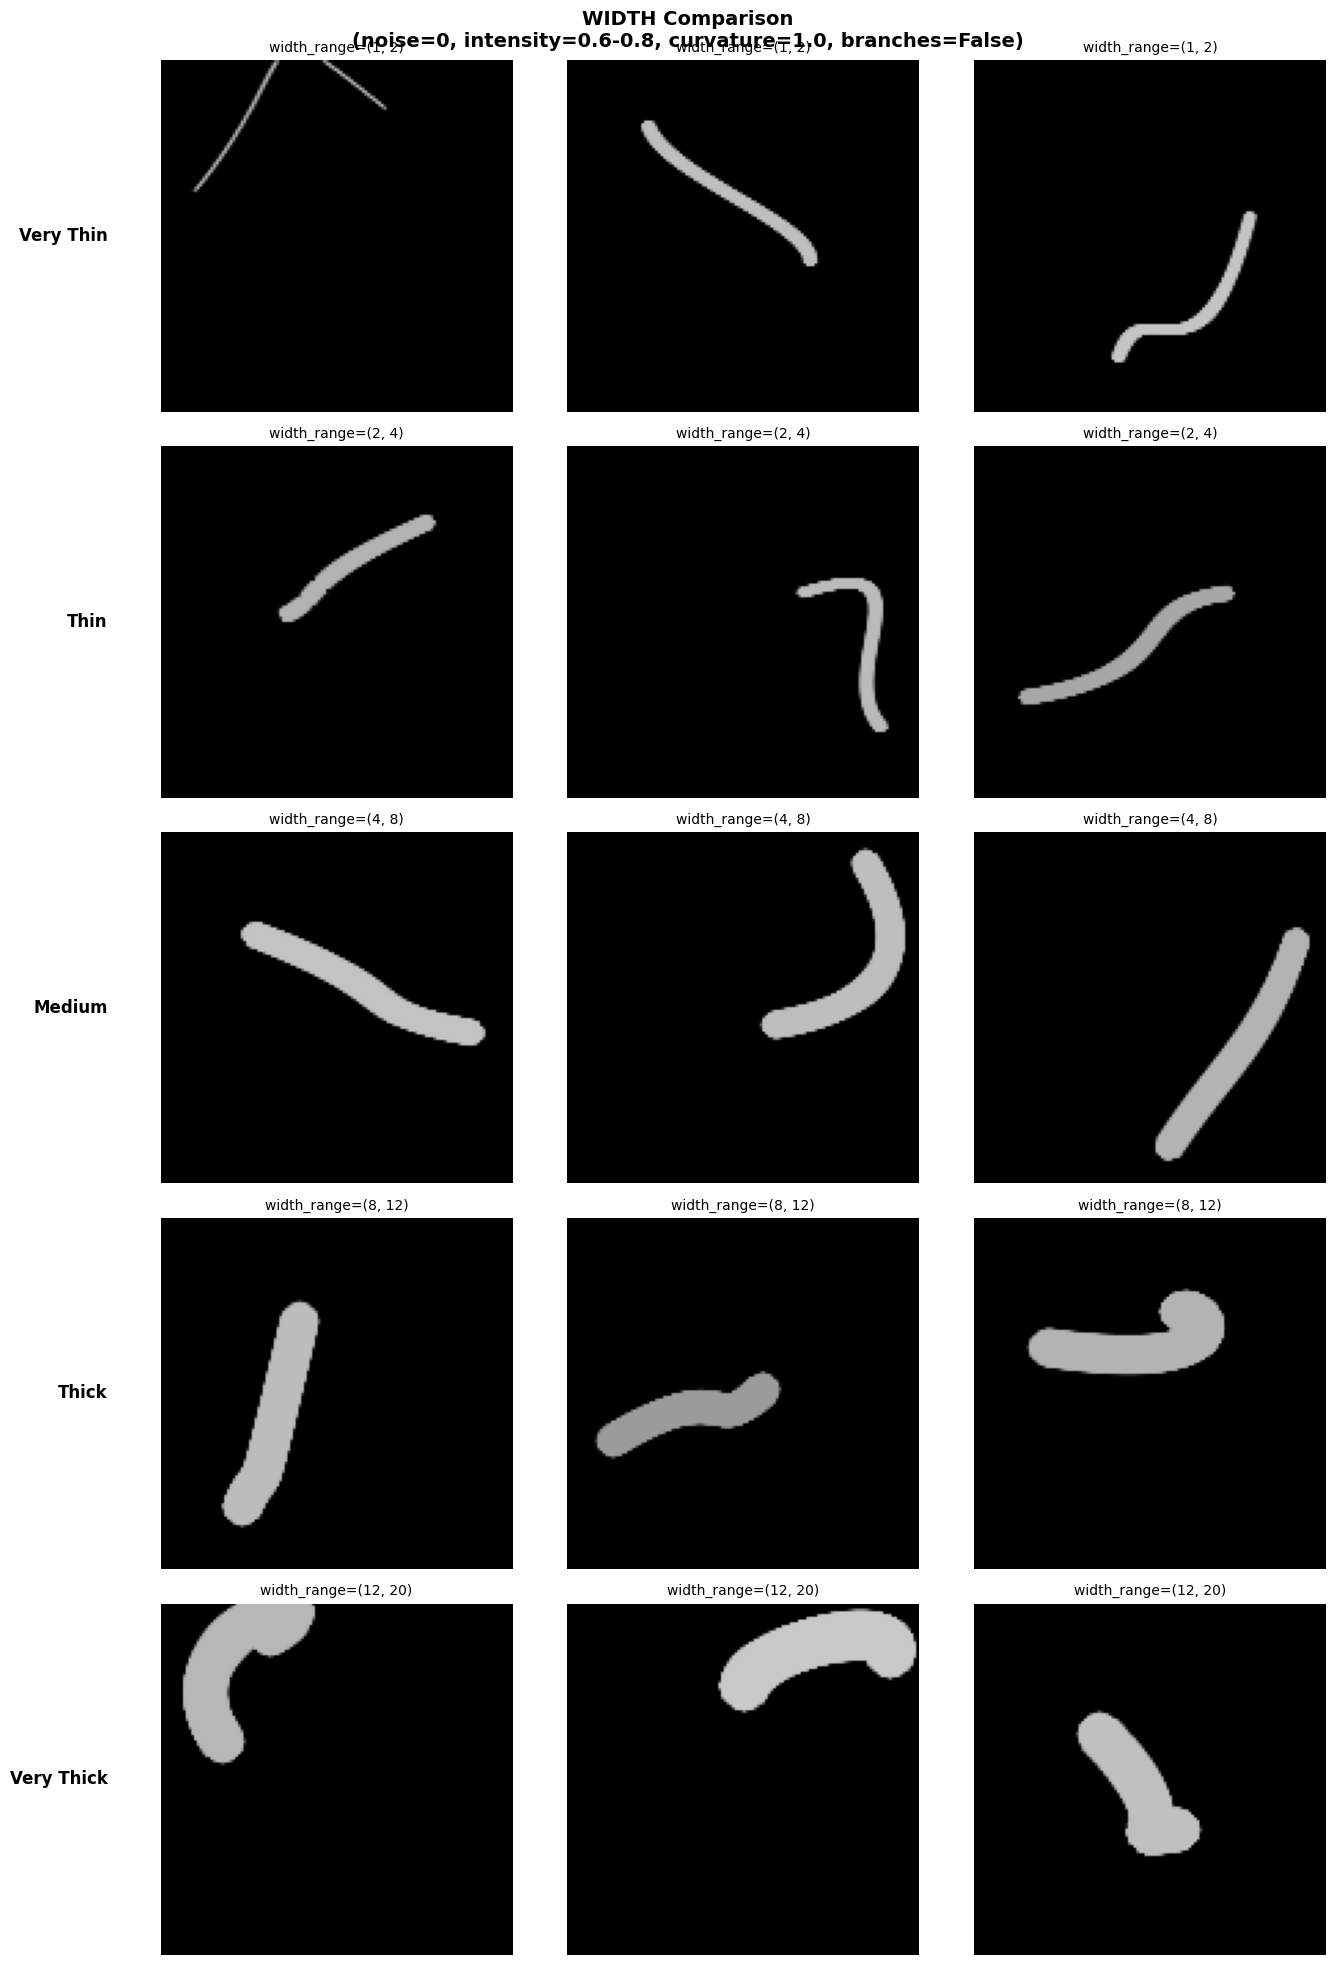

In [21]:
# WIDTH comparison
width_configs = [
    {"width_range": (1, 2), "label": "Very Thin"},
    {"width_range": (2, 4), "label": "Thin"},
    {"width_range": (4, 8), "label": "Medium"},
    {"width_range": (8, 12), "label": "Thick"},
    {"width_range": (12, 20), "label": "Very Thick"},
]

fig, axes = plt.subplots(len(width_configs), 3, figsize=(14, 4*len(width_configs)))
for i, cfg in enumerate(width_configs):
    for j in range(3):
        img, _, _ = curve_maker.sample_curve(
            width_range=cfg["width_range"],
            noise_prob=0.0, min_intensity=0.6, max_intensity=0.8,
            curvature_factor=1.0, branches=False
        )
        axes[i, j].imshow(img, cmap='gray', vmin=0, vmax=1)
        axes[i, j].axis('off')
        axes[i, j].set_title(f"width_range={cfg['width_range']}", fontsize=10)
    # Add row label on the left
    axes[i, 0].text(-0.15, 0.5, cfg["label"], transform=axes[i, 0].transAxes, 
                    fontsize=12, fontweight='bold', va='center', ha='right')
plt.suptitle("WIDTH Comparison\n(noise=0, intensity=0.6-0.8, curvature=1.0, branches=False)", 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


## 🔬 Step 4: Parameter Effects - See How Each Config Affects Images

Compare how individual parameters change the generated curves.


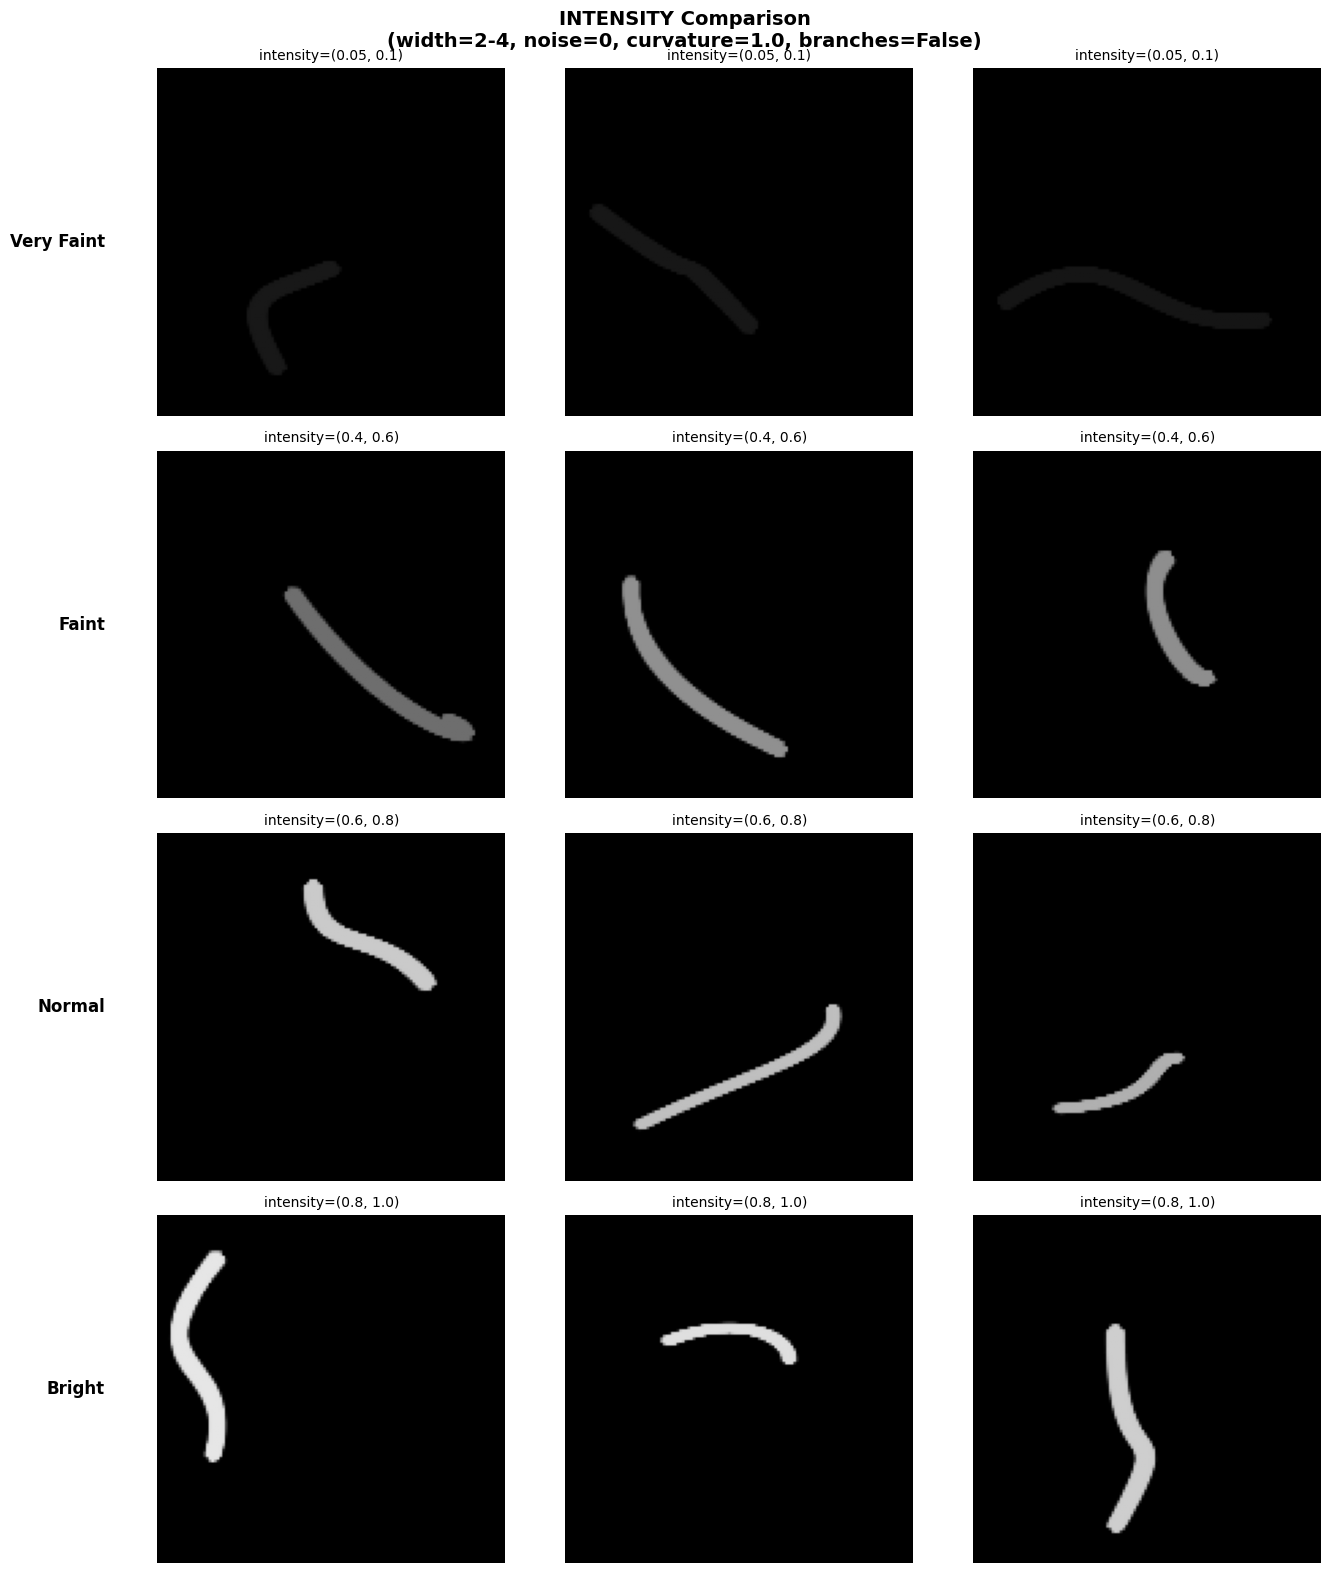

In [35]:
# INTENSITY comparison
intensity_configs = [
    {"min_intensity": 0.05, "max_intensity": 0.1, "label": "Very Faint"},
    {"min_intensity": 0.4, "max_intensity": 0.6, "label": "Faint"},
    {"min_intensity": 0.6, "max_intensity": 0.8, "label": "Normal"},
    {"min_intensity": 0.8, "max_intensity": 1.0, "label": "Bright"},
]

fig, axes = plt.subplots(len(intensity_configs), 3, figsize=(14, 4*len(intensity_configs)))
for i, cfg in enumerate(intensity_configs):
    for j in range(3):
        img, _, _ = curve_maker.sample_curve(
            width_range=(2, 4),
            noise_prob=0.0, 
            min_intensity=cfg["min_intensity"], 
            max_intensity=cfg["max_intensity"],
            curvature_factor=1.0, branches=False
        )
        axes[i, j].imshow(img, cmap='gray', vmin=0, vmax=1)
        axes[i, j].axis('off')
        axes[i, j].set_title(f"intensity=({cfg['min_intensity']}, {cfg['max_intensity']})", fontsize=10)
    axes[i, 0].text(-0.15, 0.5, cfg["label"], transform=axes[i, 0].transAxes, 
                    fontsize=12, fontweight='bold', va='center', ha='right')
plt.suptitle("INTENSITY Comparison\n(width=2-4, noise=0, curvature=1.0, branches=False)", 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


---
## 📊 NOISE Settings


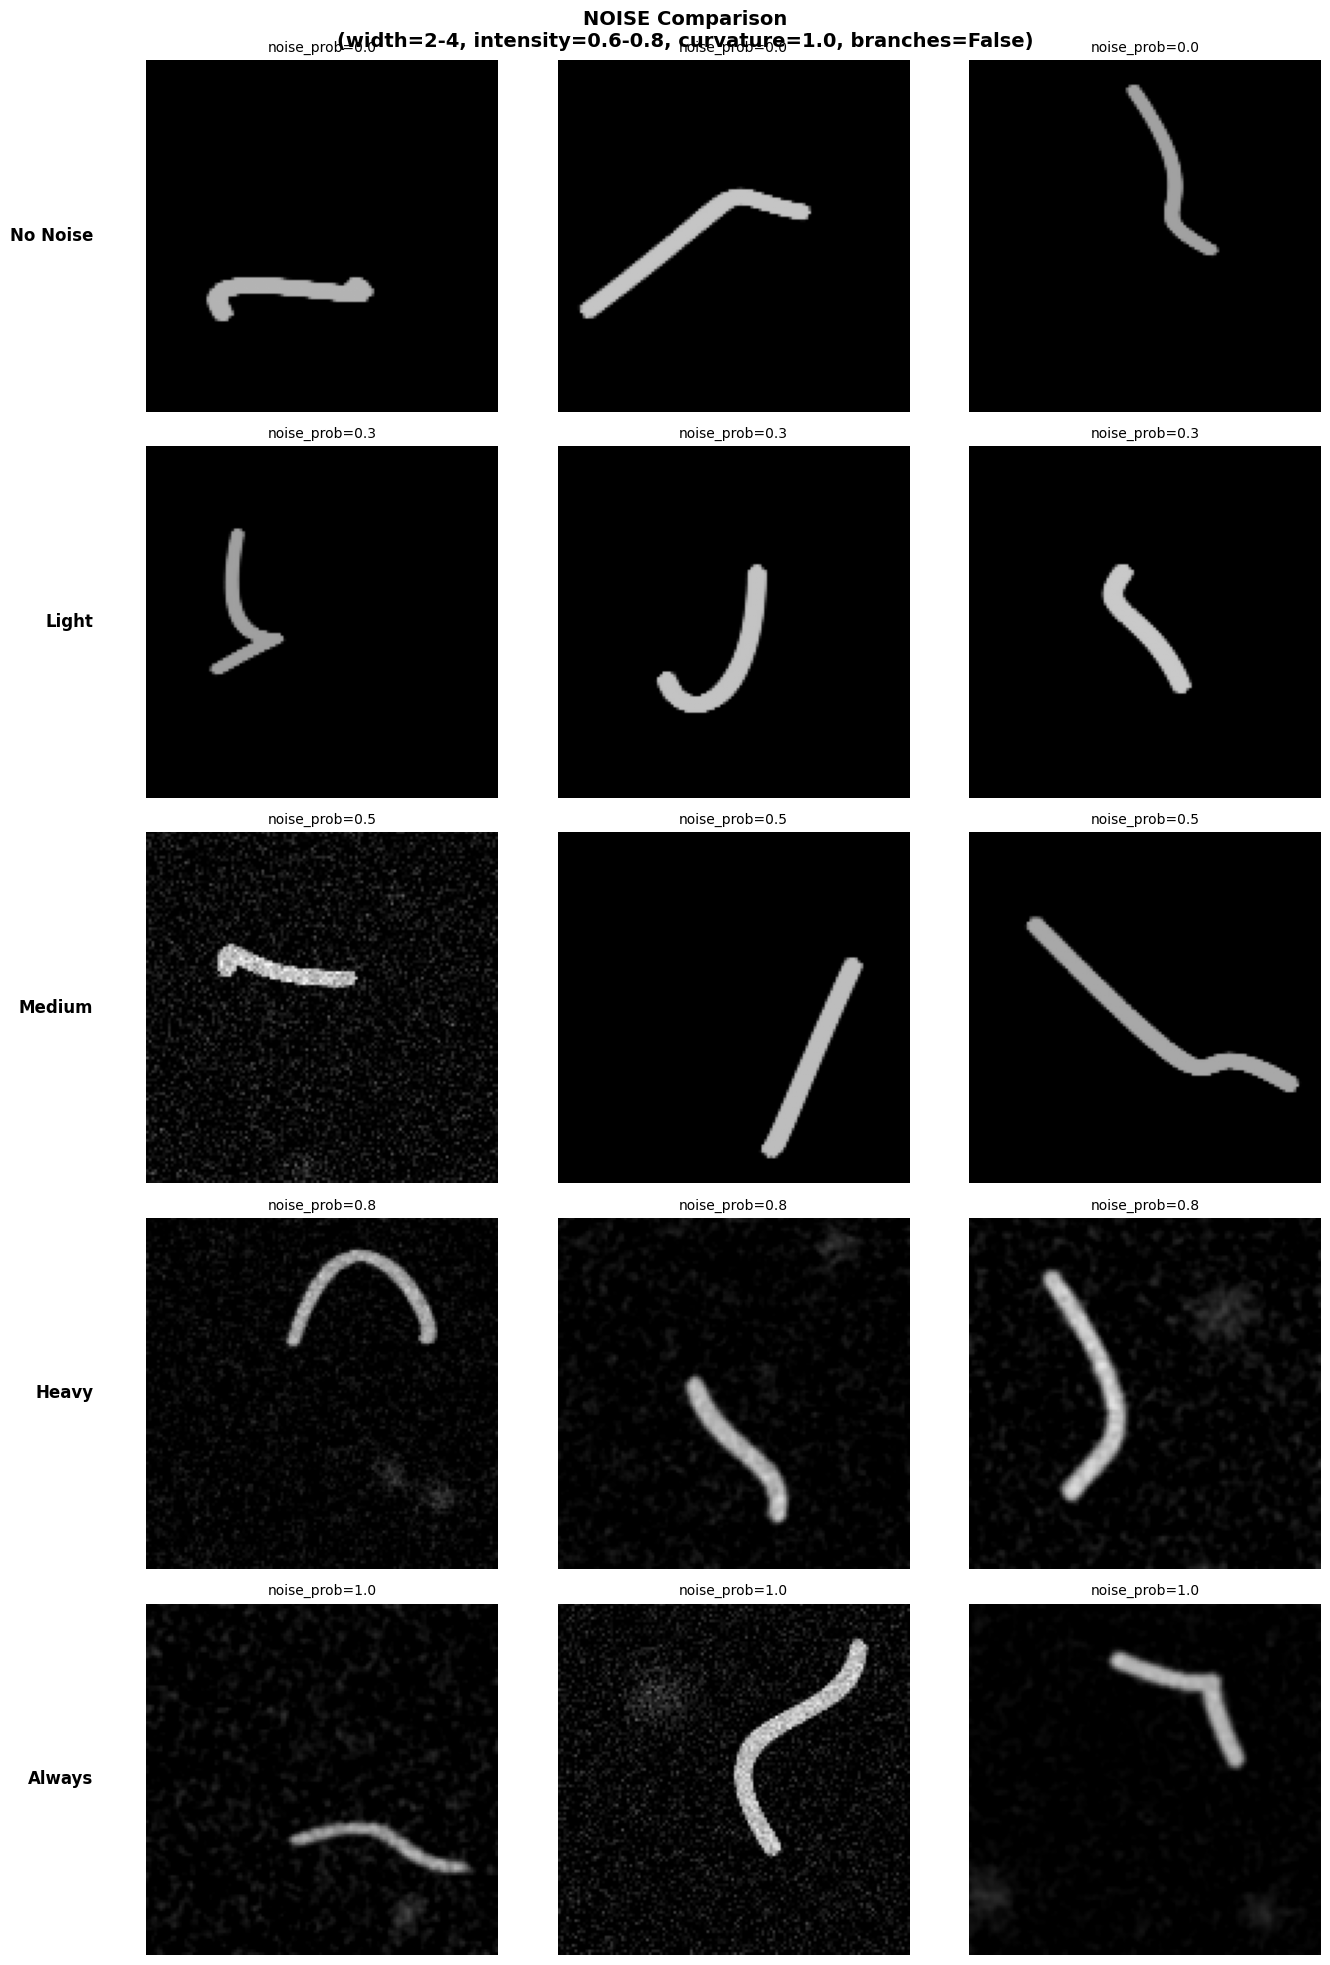

In [23]:
# NOISE comparison
noise_configs = [
    {"noise_prob": 0.0, "label": "No Noise"},
    {"noise_prob": 0.3, "label": "Light"},
    {"noise_prob": 0.5, "label": "Medium"},
    {"noise_prob": 0.8, "label": "Heavy"},
    {"noise_prob": 1.0, "label": "Always"},
]

fig, axes = plt.subplots(len(noise_configs), 3, figsize=(14, 4*len(noise_configs)))
for i, cfg in enumerate(noise_configs):
    for j in range(3):
        img, _, _ = curve_maker.sample_curve(
            width_range=(2, 4),
            noise_prob=cfg["noise_prob"], 
            min_intensity=0.6, max_intensity=0.8,
            curvature_factor=1.0, branches=False
        )
        axes[i, j].imshow(img, cmap='gray', vmin=0, vmax=1)
        axes[i, j].axis('off')
        axes[i, j].set_title(f"noise_prob={cfg['noise_prob']}", fontsize=10)
    axes[i, 0].text(-0.15, 0.5, cfg["label"], transform=axes[i, 0].transAxes, 
                    fontsize=12, fontweight='bold', va='center', ha='right')
plt.suptitle("NOISE Comparison\n(width=2-4, intensity=0.6-0.8, curvature=1.0, branches=False)", 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


---
## 📊 CURVATURE Settings


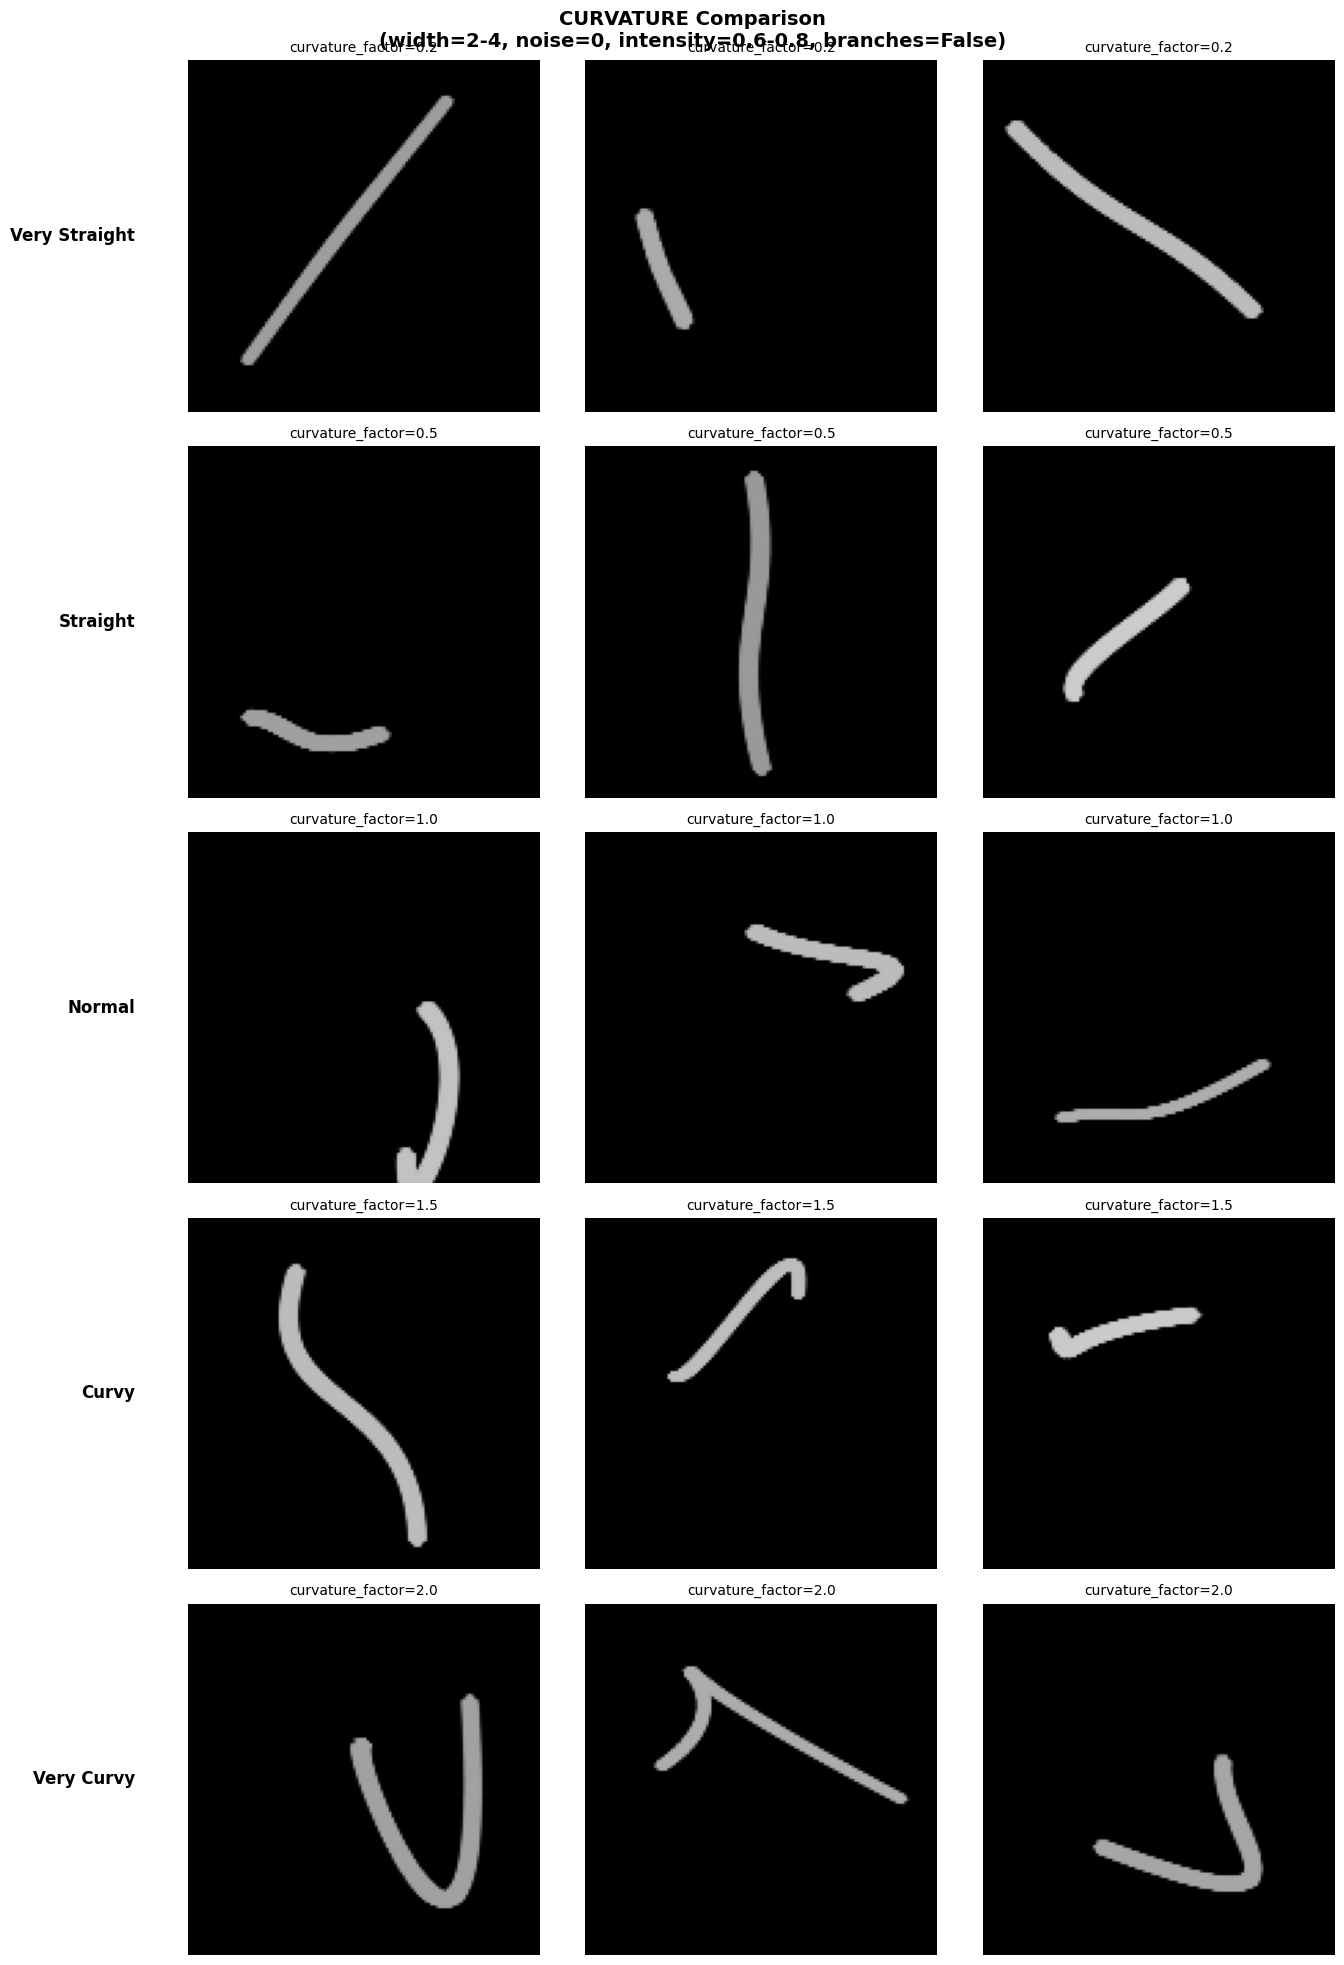

In [24]:
# CURVATURE comparison
curvature_configs = [
    {"curvature_factor": 0.2, "label": "Very Straight"},
    {"curvature_factor": 0.5, "label": "Straight"},
    {"curvature_factor": 1.0, "label": "Normal"},
    {"curvature_factor": 1.5, "label": "Curvy"},
    {"curvature_factor": 2.0, "label": "Very Curvy"},
]

fig, axes = plt.subplots(len(curvature_configs), 3, figsize=(14, 4*len(curvature_configs)))
for i, cfg in enumerate(curvature_configs):
    for j in range(3):
        img, _, _ = curve_maker.sample_curve(
            width_range=(2, 4),
            noise_prob=0.0, 
            min_intensity=0.6, max_intensity=0.8,
            curvature_factor=cfg["curvature_factor"], branches=False
        )
        axes[i, j].imshow(img, cmap='gray', vmin=0, vmax=1)
        axes[i, j].axis('off')
        axes[i, j].set_title(f"curvature_factor={cfg['curvature_factor']}", fontsize=10)
    axes[i, 0].text(-0.15, 0.5, cfg["label"], transform=axes[i, 0].transAxes, 
                    fontsize=12, fontweight='bold', va='center', ha='right')
plt.suptitle("CURVATURE Comparison\n(width=2-4, noise=0, intensity=0.6-0.8, branches=False)", 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


---
## 📊 BRANCHES Setting


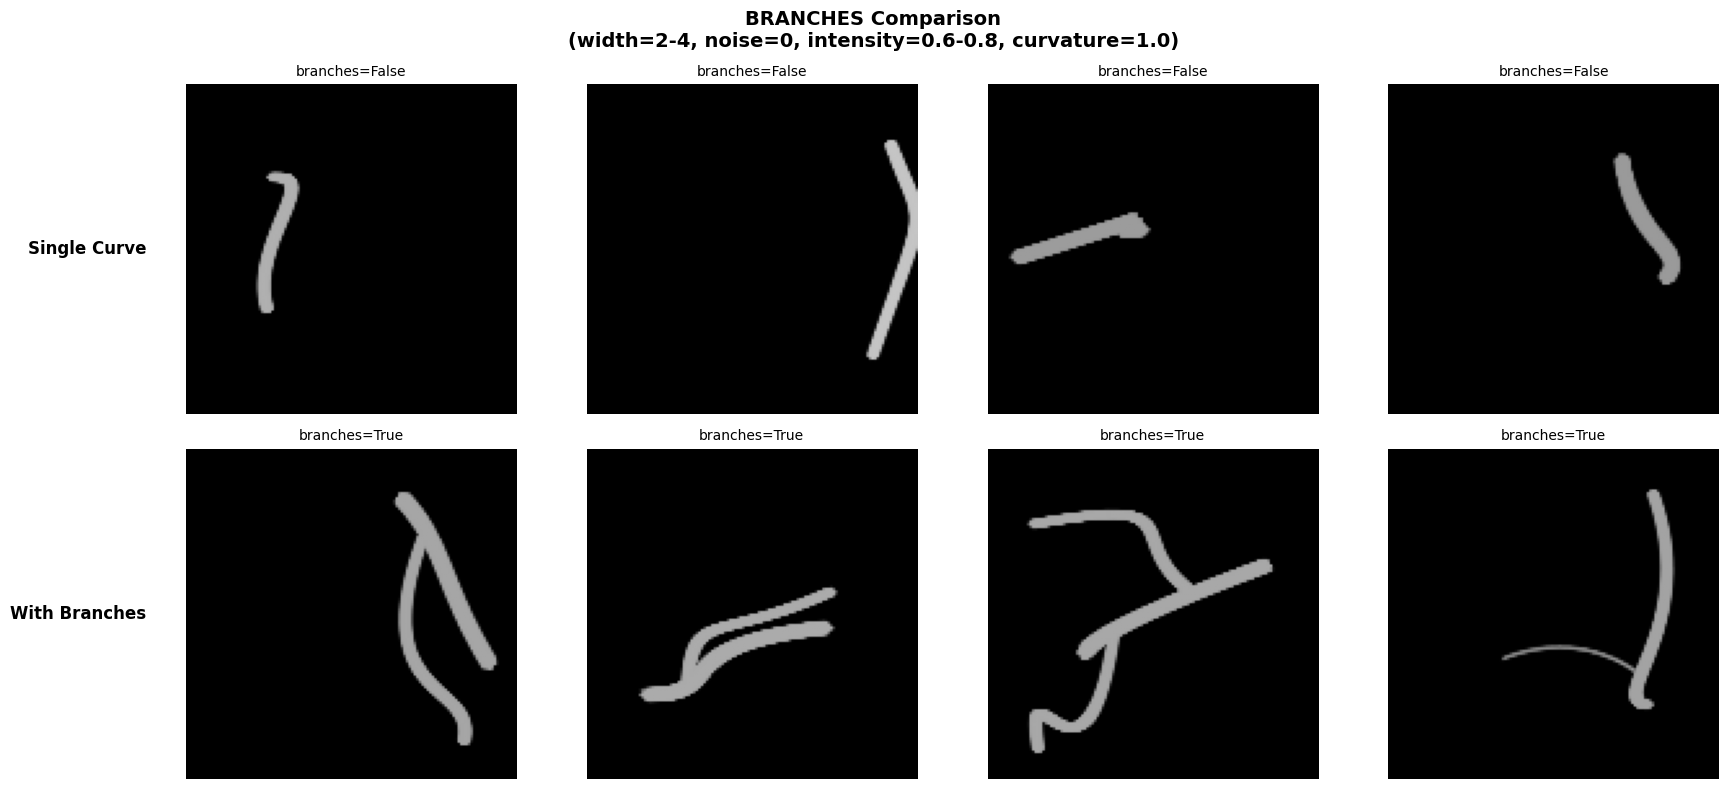

In [25]:
# BRANCHES comparison
branches_configs = [
    {"branches": False, "label": "Single Curve"},
    {"branches": True, "label": "With Branches"},
]

fig, axes = plt.subplots(len(branches_configs), 4, figsize=(18, 4*len(branches_configs)))
for i, cfg in enumerate(branches_configs):
    for j in range(4):
        img, _, _ = curve_maker.sample_curve(
            width_range=(2, 4),
            noise_prob=0.0, 
            min_intensity=0.6, max_intensity=0.8,
            curvature_factor=1.0, branches=cfg["branches"]
        )
        axes[i, j].imshow(img, cmap='gray', vmin=0, vmax=1)
        axes[i, j].axis('off')
        axes[i, j].set_title(f"branches={cfg['branches']}", fontsize=10)
    axes[i, 0].text(-0.12, 0.5, cfg["label"], transform=axes[i, 0].transAxes, 
                    fontsize=12, fontweight='bold', va='center', ha='right')
plt.suptitle("BRANCHES Comparison\n(width=2-4, noise=0, intensity=0.6-0.8, curvature=1.0)", 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


## 🔄 Step 8: Inverted Images - Normal vs Inverted


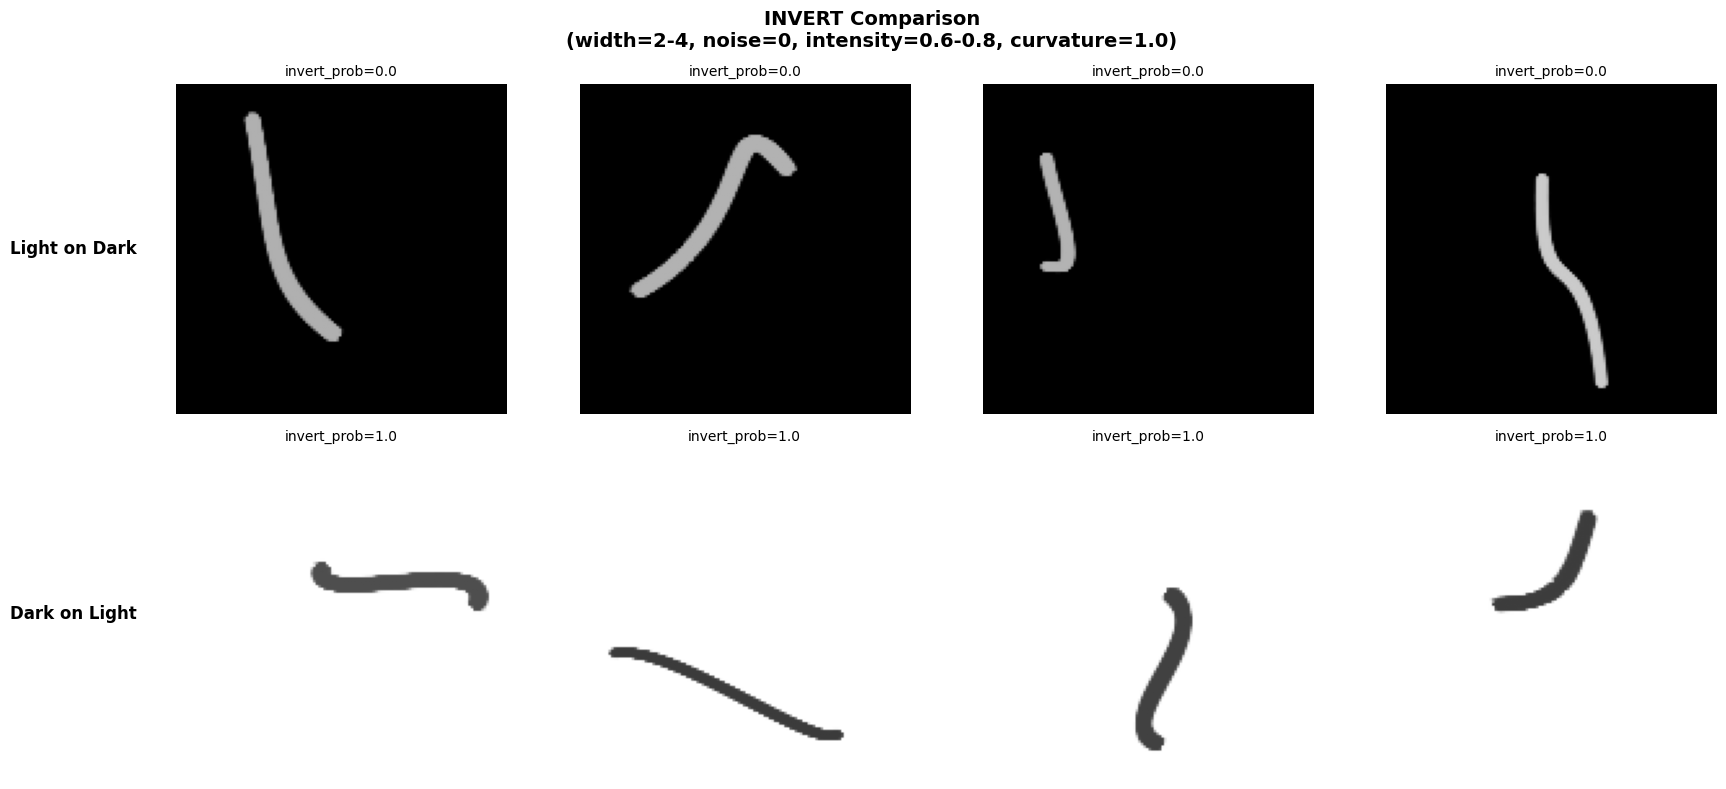

In [26]:
# INVERT comparison
invert_configs = [
    {"invert_prob": 0.0, "label": "Light on Dark"},
    {"invert_prob": 1.0, "label": "Dark on Light"},
]

fig, axes = plt.subplots(len(invert_configs), 4, figsize=(18, 4*len(invert_configs)))
for i, cfg in enumerate(invert_configs):
    for j in range(4):
        img, _, _ = curve_maker.sample_curve(
            width_range=(2, 4),
            noise_prob=0.0, 
            min_intensity=0.6, max_intensity=0.8,
            curvature_factor=1.0, branches=False,
            invert_prob=cfg["invert_prob"]
        )
        axes[i, j].imshow(img, cmap='gray', vmin=0, vmax=1)
        axes[i, j].axis('off')
        axes[i, j].set_title(f"invert_prob={cfg['invert_prob']}", fontsize=10)
    axes[i, 0].text(-0.12, 0.5, cfg["label"], transform=axes[i, 0].transAxes, 
                    fontsize=12, fontweight='bold', va='center', ha='right')
plt.suptitle("INVERT Comparison\n(width=2-4, noise=0, intensity=0.6-0.8, curvature=1.0)", 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


---
## 📊 WIDTH VARIATION Setting


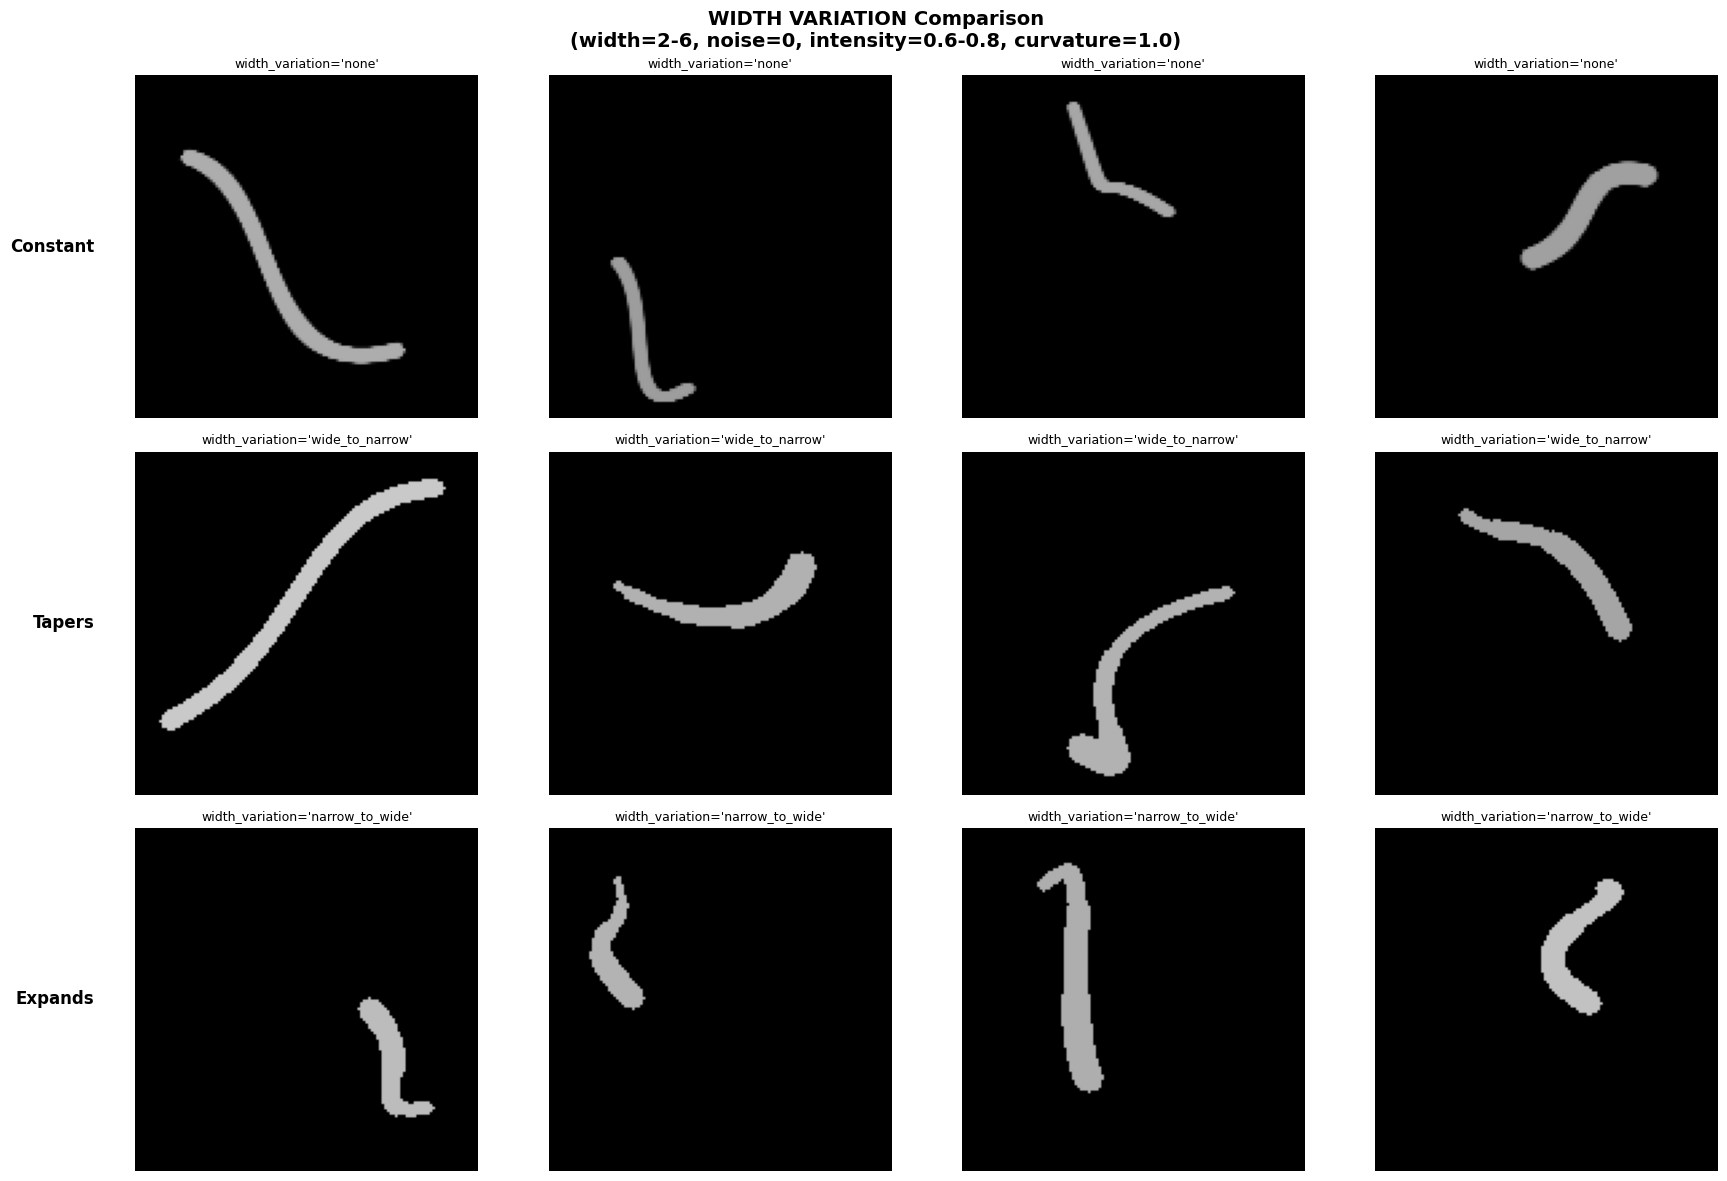

In [27]:
# WIDTH VARIATION comparison
width_var_configs = [
    {"width_variation": "none", "label": "Constant"},
    {"width_variation": "wide_to_narrow", "label": "Tapers"},
    {"width_variation": "narrow_to_wide", "label": "Expands"},
]

fig, axes = plt.subplots(len(width_var_configs), 4, figsize=(18, 4*len(width_var_configs)))
for i, cfg in enumerate(width_var_configs):
    for j in range(4):
        img, _, _ = curve_maker.sample_curve(
            width_range=(2, 6),
            noise_prob=0.0, 
            min_intensity=0.6, max_intensity=0.8,
            curvature_factor=1.0, branches=False,
            width_variation=cfg["width_variation"]
        )
        axes[i, j].imshow(img, cmap='gray', vmin=0, vmax=1)
        axes[i, j].axis('off')
        axes[i, j].set_title(f"width_variation='{cfg['width_variation']}'", fontsize=9)
    axes[i, 0].text(-0.12, 0.5, cfg["label"], transform=axes[i, 0].transAxes, 
                    fontsize=12, fontweight='bold', va='center', ha='right')
plt.suptitle("WIDTH VARIATION Comparison\n(width=2-6, noise=0, intensity=0.6-0.8, curvature=1.0)", 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


---
## 📊 INTENSITY VARIATION Setting


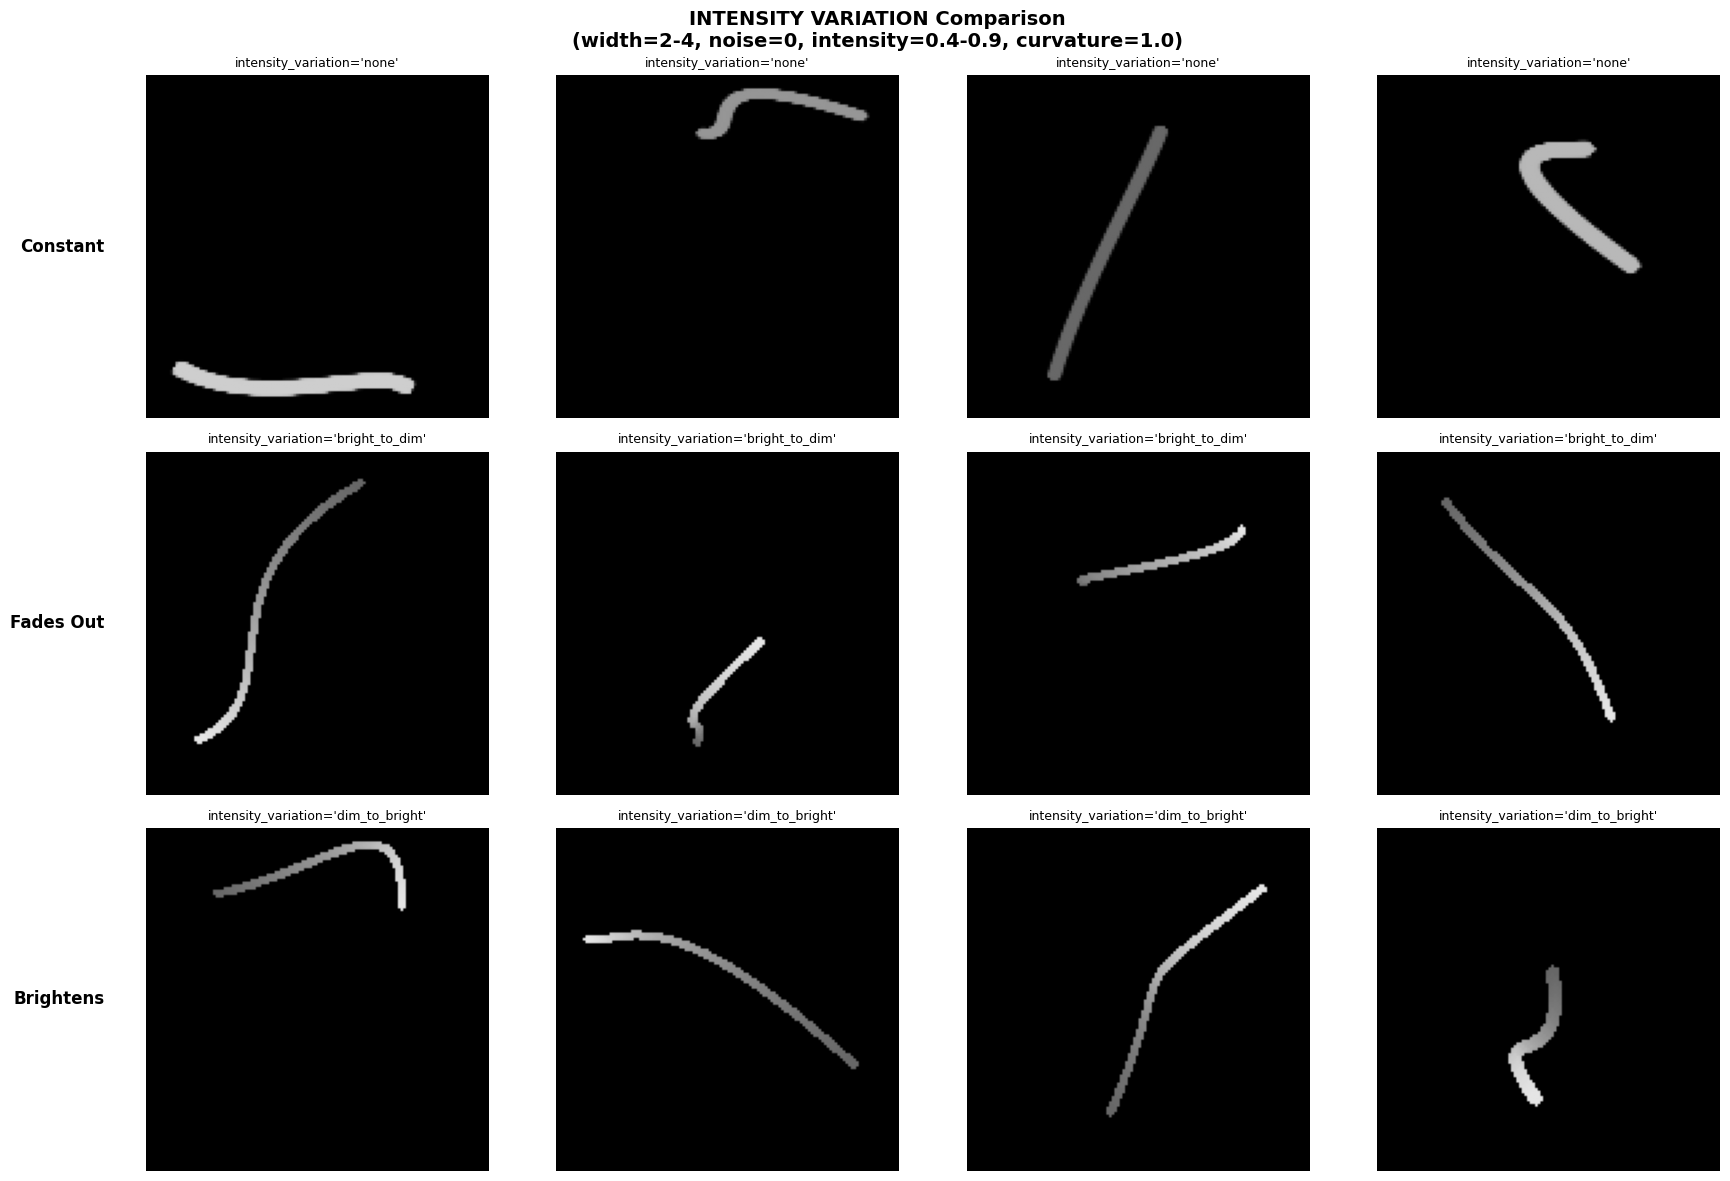

In [28]:
# INTENSITY VARIATION comparison
int_var_configs = [
    {"intensity_variation": "none", "label": "Constant"},
    {"intensity_variation": "bright_to_dim", "label": "Fades Out"},
    {"intensity_variation": "dim_to_bright", "label": "Brightens"},
]

fig, axes = plt.subplots(len(int_var_configs), 4, figsize=(18, 4*len(int_var_configs)))
for i, cfg in enumerate(int_var_configs):
    for j in range(4):
        img, _, _ = curve_maker.sample_curve(
            width_range=(2, 4),
            noise_prob=0.0, 
            min_intensity=0.4, max_intensity=0.9,
            curvature_factor=1.0, branches=False,
            intensity_variation=cfg["intensity_variation"]
        )
        axes[i, j].imshow(img, cmap='gray', vmin=0, vmax=1)
        axes[i, j].axis('off')
        axes[i, j].set_title(f"intensity_variation='{cfg['intensity_variation']}'", fontsize=9)
    axes[i, 0].text(-0.12, 0.5, cfg["label"], transform=axes[i, 0].transAxes, 
                    fontsize=12, fontweight='bold', va='center', ha='right')
plt.suptitle("INTENSITY VARIATION Comparison\n(width=2-4, noise=0, intensity=0.4-0.9, curvature=1.0)", 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


## 📊 SELF CROSSING Settings


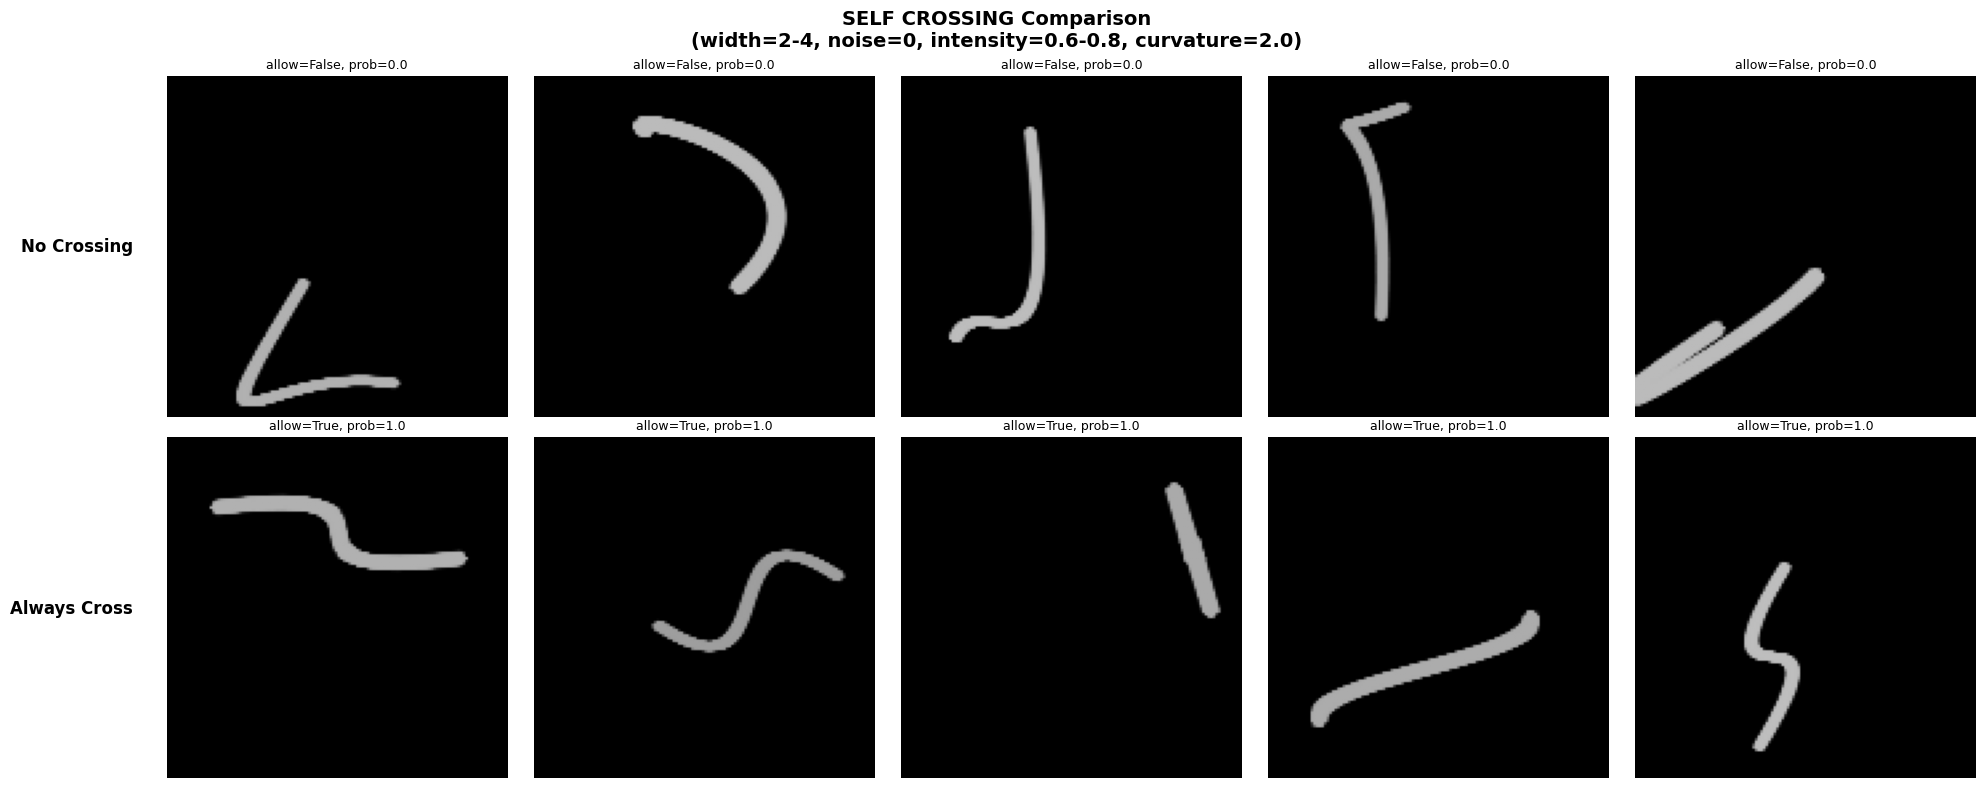


Self-crossing at different curvature levels:


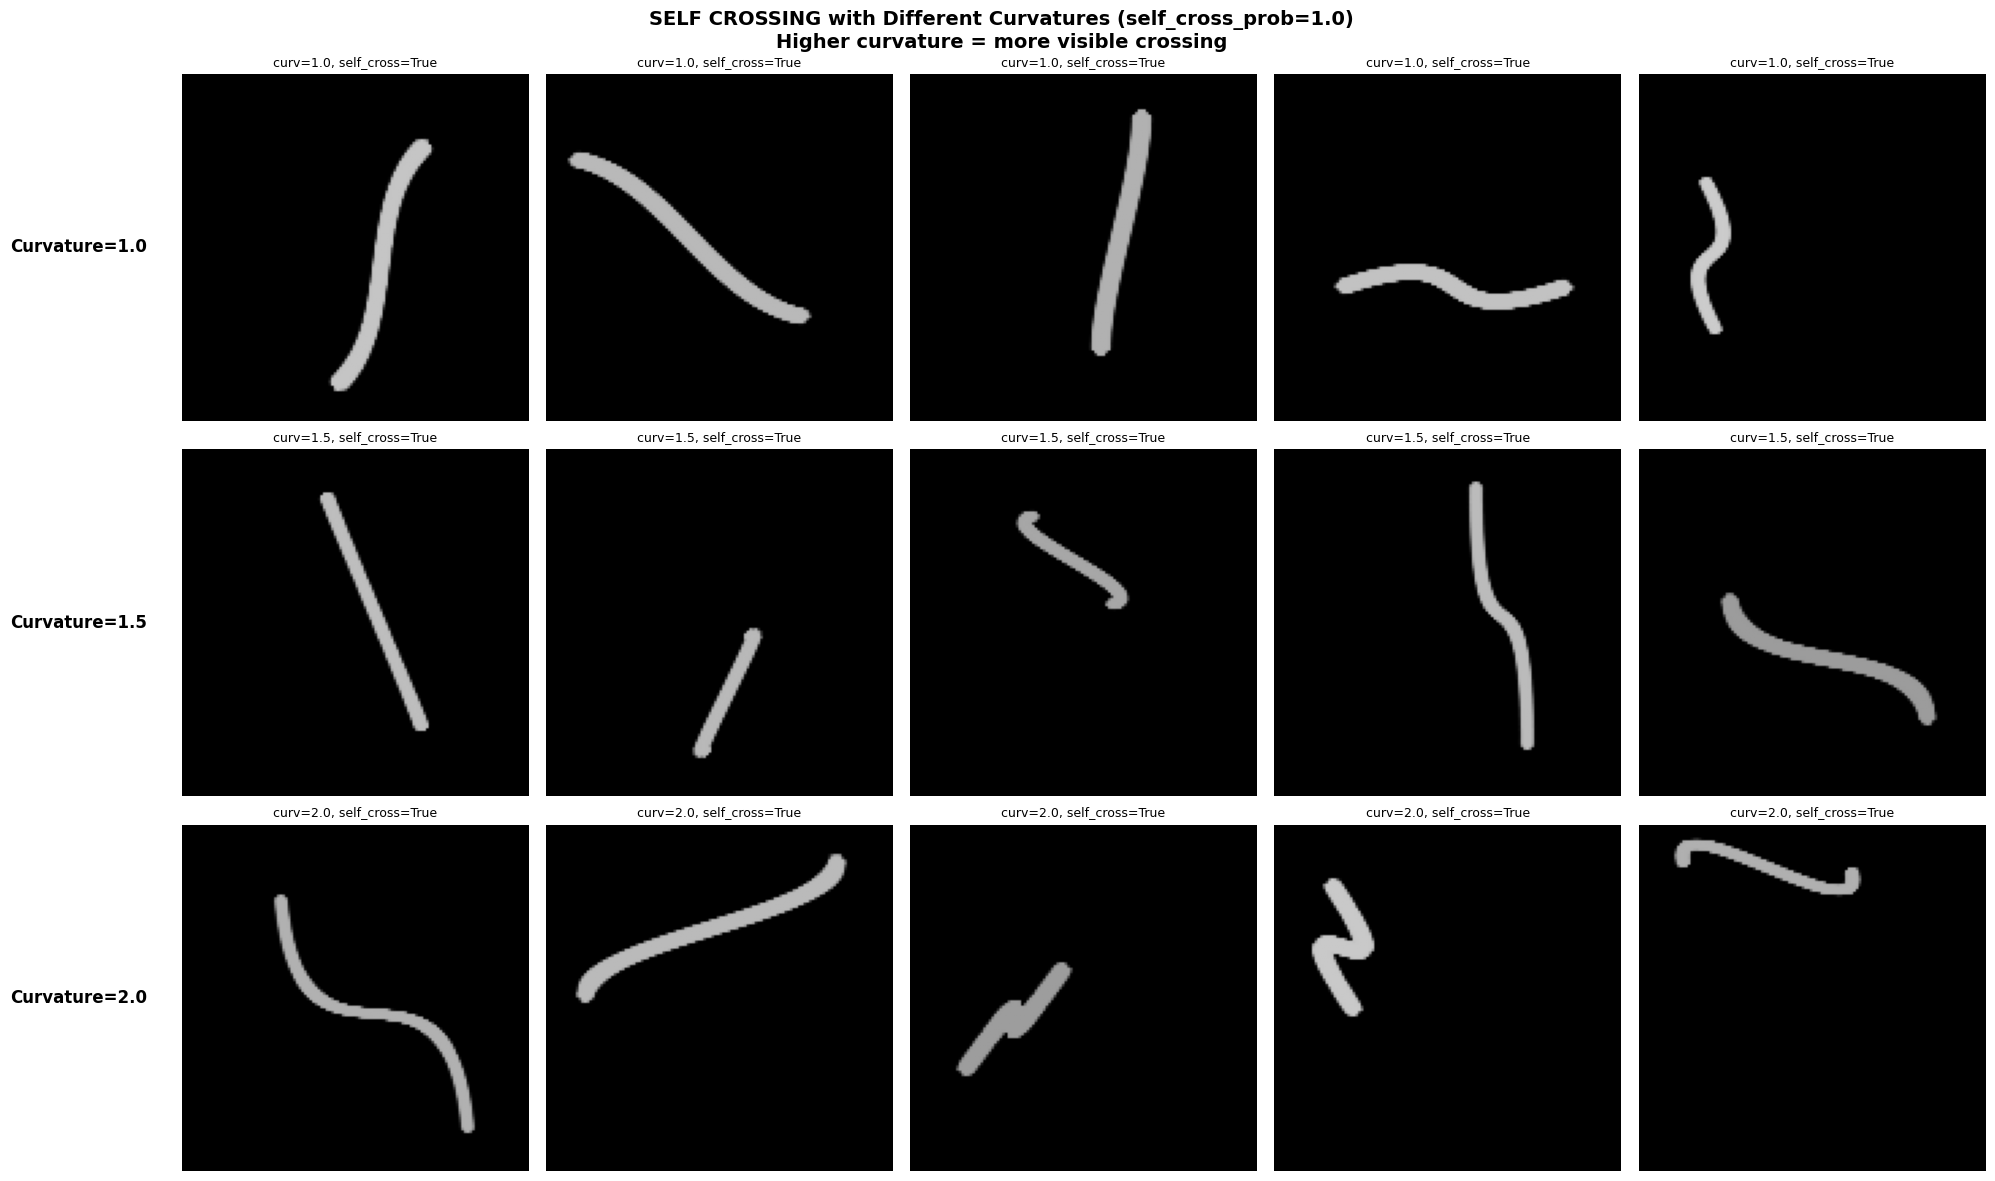

In [37]:
# SELF CROSSING comparison
# allow_self_cross: Whether curves can cross themselves
# self_cross_prob: Probability of self-crossing when allowed
# NOTE: Self-crossing is more visible with higher curvature_factor (2.0+)

self_cross_configs = [
    {"allow_self_cross": False, "self_cross_prob": 0.0, "label": "No Crossing"},
    {"allow_self_cross": True, "self_cross_prob": 1.0, "label": "Always Cross"},
]

fig, axes = plt.subplots(len(self_cross_configs), 5, figsize=(20, 4*len(self_cross_configs)))
for i, cfg in enumerate(self_cross_configs):
    for j in range(5):
        img, _, _ = curve_maker.sample_curve(
            width_range=(2, 4),
            noise_prob=0.0, 
            min_intensity=0.6, max_intensity=0.8,
            curvature_factor=2.0,  # Higher curvature makes self-crossing more visible
            branches=False,
            allow_self_cross=cfg["allow_self_cross"],
            self_cross_prob=cfg["self_cross_prob"]
        )
        axes[i, j].imshow(img, cmap='gray', vmin=0, vmax=1)
        axes[i, j].axis('off')
        axes[i, j].set_title(f"allow={cfg['allow_self_cross']}, prob={cfg['self_cross_prob']}", fontsize=9)
    axes[i, 0].text(-0.1, 0.5, cfg["label"], transform=axes[i, 0].transAxes, 
                    fontsize=12, fontweight='bold', va='center', ha='right')
plt.suptitle("SELF CROSSING Comparison\n(width=2-4, noise=0, intensity=0.6-0.8, curvature=2.0)", 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# More samples with self-crossing at different curvatures
print("\n" + "="*60)
print("Self-crossing at different curvature levels:")
print("="*60)

fig, axes = plt.subplots(3, 5, figsize=(20, 12))
curvatures = [1.0, 1.5, 2.0]
for i, curv in enumerate(curvatures):
    for j in range(5):
        img, _, _ = curve_maker.sample_curve(
            width_range=(2, 4),
            noise_prob=0.0, 
            min_intensity=0.6, max_intensity=0.8,
            curvature_factor=curv,
            branches=False,
            allow_self_cross=True,
            self_cross_prob=1.0
        )
        axes[i, j].imshow(img, cmap='gray', vmin=0, vmax=1)
        axes[i, j].axis('off')
        axes[i, j].set_title(f"curv={curv}, self_cross=True", fontsize=9)
    axes[i, 0].text(-0.1, 0.5, f"Curvature={curv}", transform=axes[i, 0].transAxes, 
                    fontsize=12, fontweight='bold', va='center', ha='right')
plt.suptitle("SELF CROSSING with Different Curvatures (self_cross_prob=1.0)\nHigher curvature = more visible crossing", 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


---


## 📊 BACKGROUND INTENSITY Settings


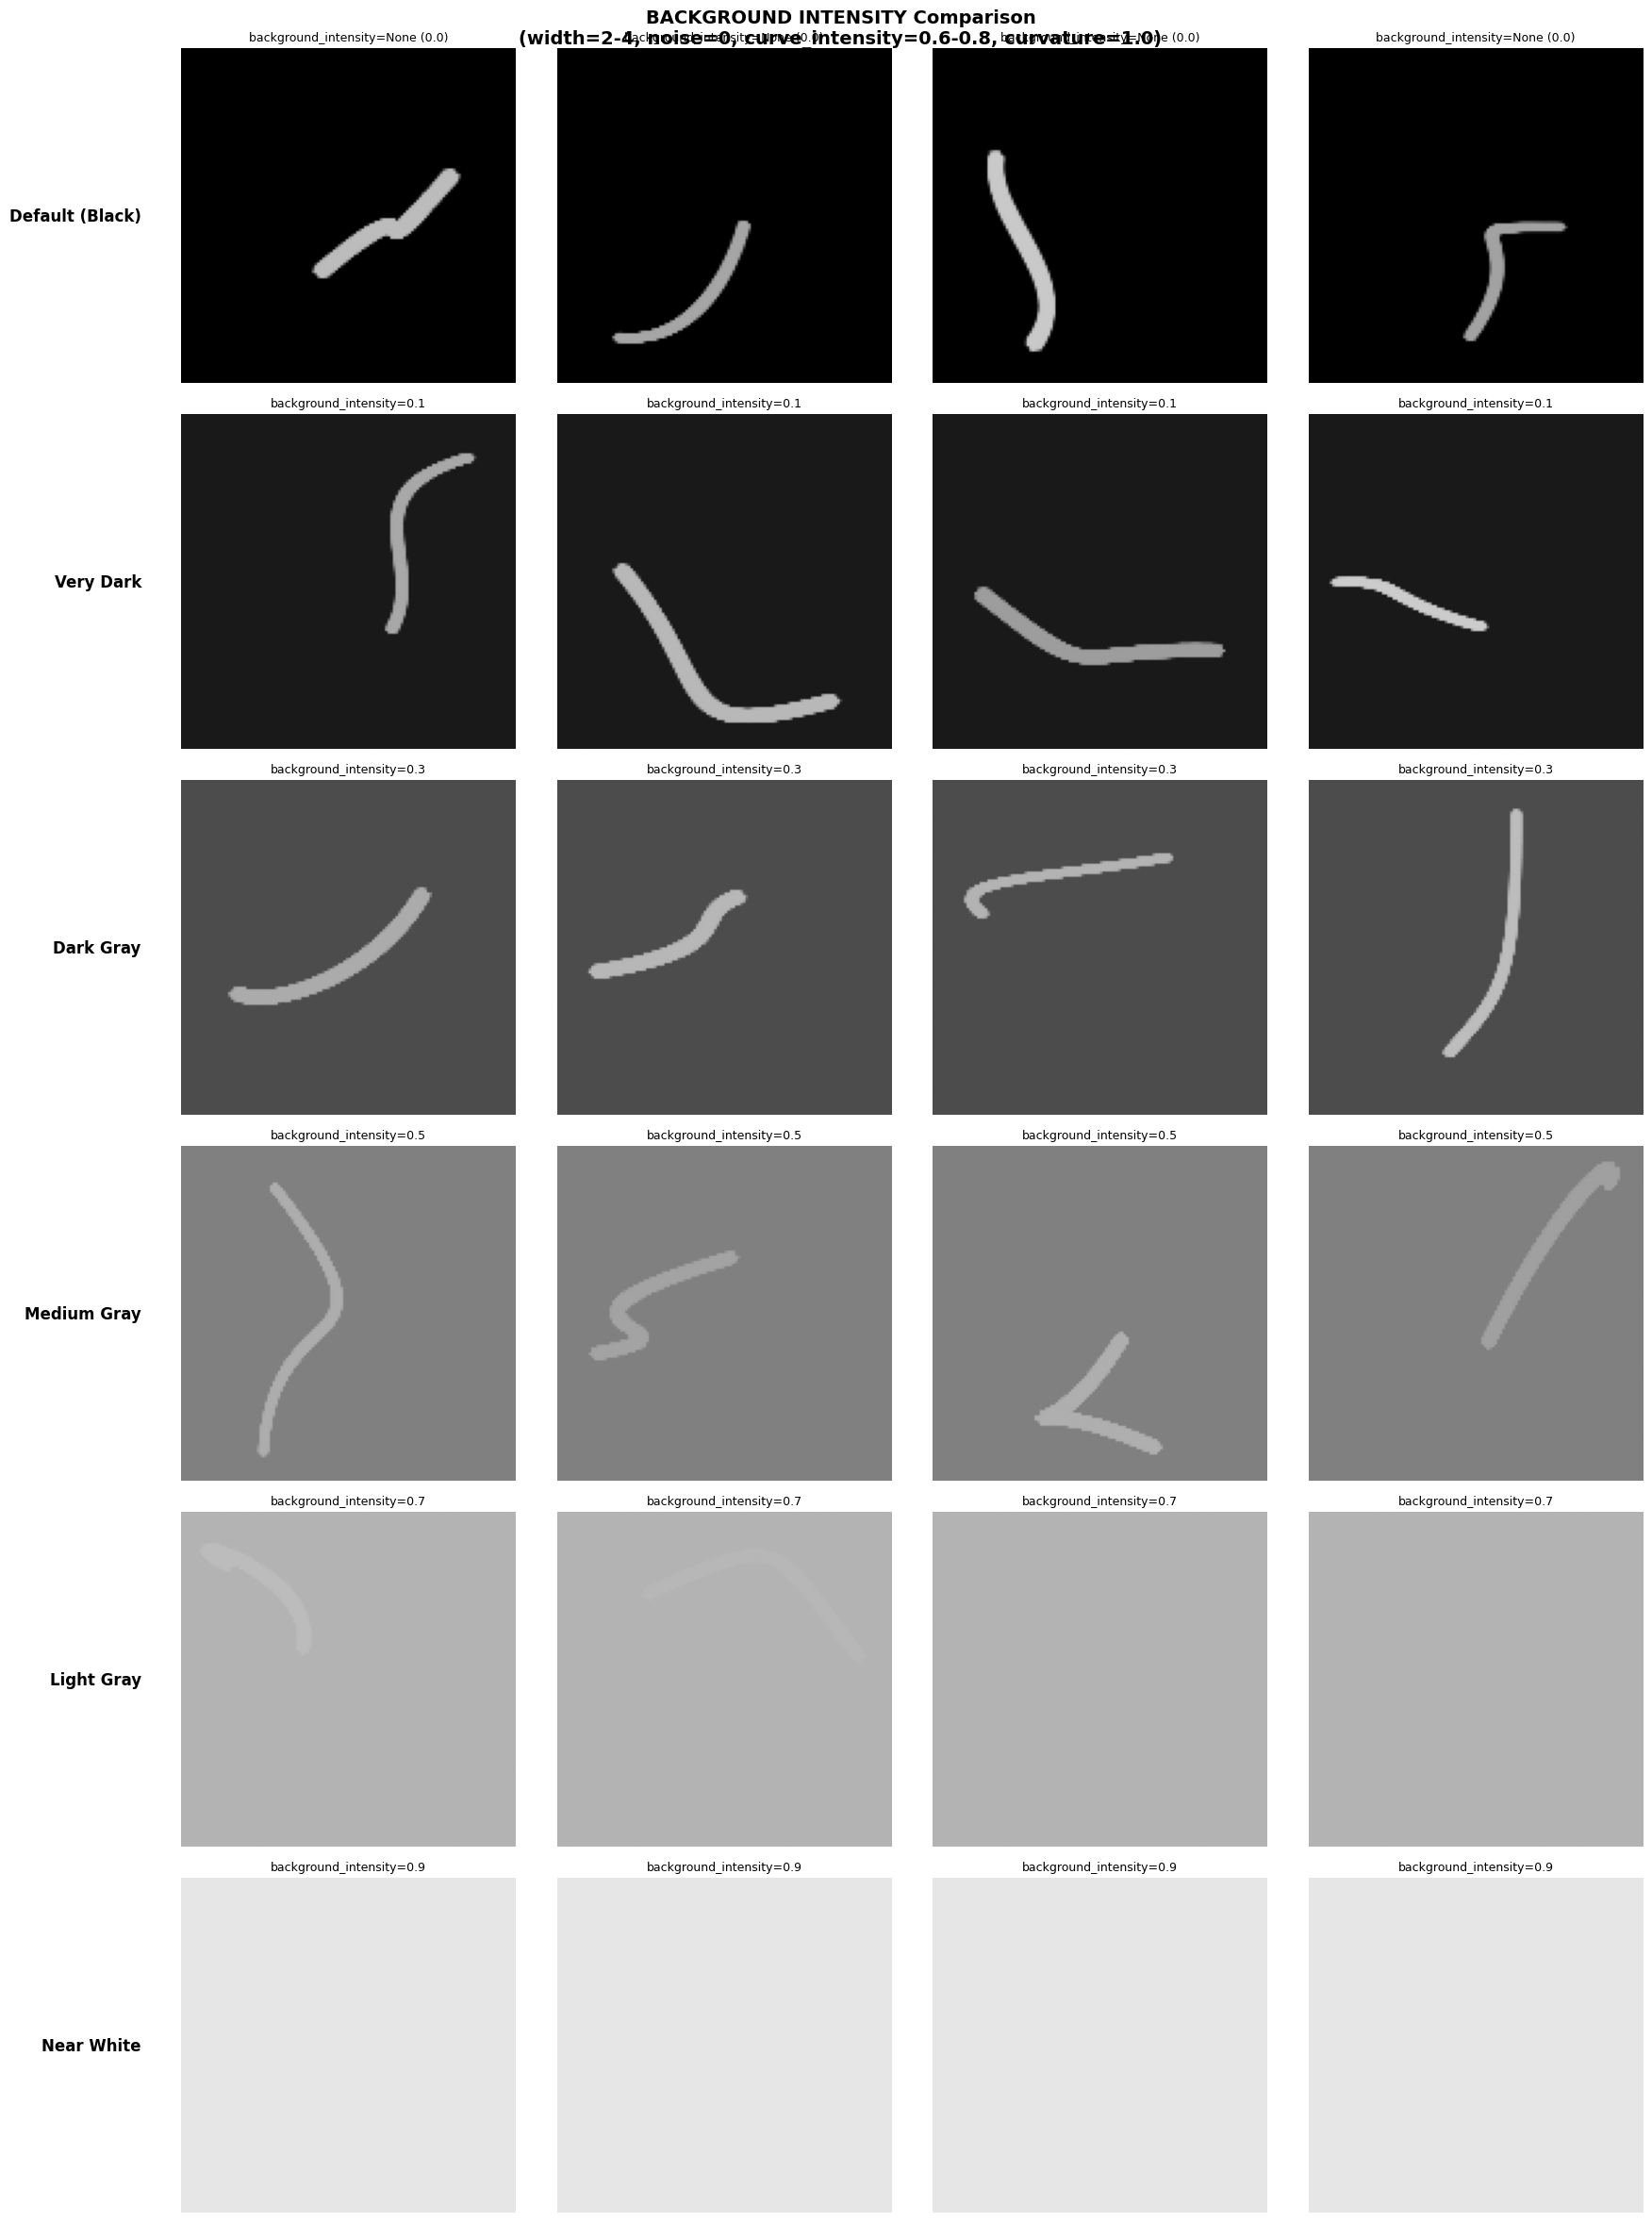

In [38]:
# BACKGROUND INTENSITY comparison
# background_intensity: Sets the background color (0.0=black, 1.0=white)
# Default is None which uses 0.0 (black background)

bg_configs = [
    {"background_intensity": None, "label": "Default (Black)"},
    {"background_intensity": 0.1, "label": "Very Dark"},
    {"background_intensity": 0.3, "label": "Dark Gray"},
    {"background_intensity": 0.5, "label": "Medium Gray"},
    {"background_intensity": 0.7, "label": "Light Gray"},
    {"background_intensity": 0.9, "label": "Near White"},
]

fig, axes = plt.subplots(len(bg_configs), 4, figsize=(18, 4*len(bg_configs)))
for i, cfg in enumerate(bg_configs):
    for j in range(4):
        img, _, _ = curve_maker.sample_curve(
            width_range=(2, 4),
            noise_prob=0.0, 
            min_intensity=0.6, max_intensity=0.8,
            curvature_factor=1.0, branches=False,
            background_intensity=cfg["background_intensity"]
        )
        axes[i, j].imshow(img, cmap='gray', vmin=0, vmax=1)
        axes[i, j].axis('off')
        bg_val = cfg["background_intensity"] if cfg["background_intensity"] is not None else "None (0.0)"
        axes[i, j].set_title(f"background_intensity={bg_val}", fontsize=9)
    axes[i, 0].text(-0.12, 0.5, cfg["label"], transform=axes[i, 0].transAxes, 
                    fontsize=12, fontweight='bold', va='center', ha='right')
plt.suptitle("BACKGROUND INTENSITY Comparison\n(width=2-4, noise=0, curve_intensity=0.6-0.8, curvature=1.0)", 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


---


---
## 🧪 Custom Config Tester


TESTING CONFIG:
width_range=(3, 6), noise_prob=0.3, curvature_factor=1.5
intensity=(0.6, 0.8), branches=True, invert_prob=0.0
width_variation='none', intensity_variation='none'
allow_self_cross=False, self_cross_prob=0.0
background_intensity=None


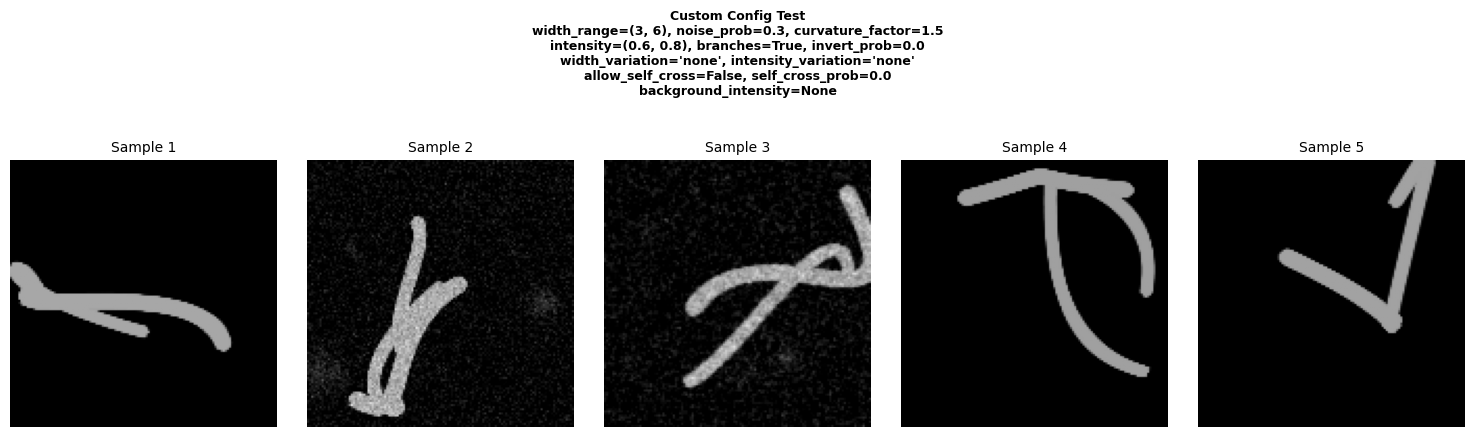

In [39]:
def test_custom_config(
    width_range=(2, 4),
    noise_prob=0.0,
    curvature_factor=1.0,
    min_intensity=0.6,
    max_intensity=0.8,
    branches=False,
    invert_prob=0.0,
    width_variation='none',
    intensity_variation='none',
    allow_self_cross=False,
    self_cross_prob=0.0,
    background_intensity=None,
    n_samples=6
):
    """Test any custom config and see the results."""
    # Build config string for display
    config_str = (
        f"width_range={width_range}, noise_prob={noise_prob}, curvature_factor={curvature_factor}\n"
        f"intensity=({min_intensity}, {max_intensity}), branches={branches}, invert_prob={invert_prob}\n"
        f"width_variation='{width_variation}', intensity_variation='{intensity_variation}'\n"
        f"allow_self_cross={allow_self_cross}, self_cross_prob={self_cross_prob}\n"
        f"background_intensity={background_intensity}"
    )
    print("=" * 70)
    print("TESTING CONFIG:")
    print(config_str)
    print("=" * 70)
    
    fig, axes = plt.subplots(1, n_samples, figsize=(3*n_samples, 4))
    for i in range(n_samples):
        img, _, _ = curve_maker.sample_curve(
            width_range=width_range,
            noise_prob=noise_prob,
            min_intensity=min_intensity,
            max_intensity=max_intensity,
            curvature_factor=curvature_factor,
            branches=branches,
            invert_prob=invert_prob,
            width_variation=width_variation,
            intensity_variation=intensity_variation,
            allow_self_cross=allow_self_cross,
            self_cross_prob=self_cross_prob,
            background_intensity=background_intensity
        )
        axes[i].imshow(img, cmap='gray', vmin=0, vmax=1)
        axes[i].axis('off')
        axes[i].set_title(f"Sample {i+1}", fontsize=10)
    
    # Add config as figure title
    plt.suptitle(f"Custom Config Test\n{config_str}", fontsize=9, fontweight='bold', y=1.08)
    plt.tight_layout()
    plt.show()

# Example: Test your own config!
test_custom_config(
    width_range=(3, 6),
    noise_prob=0.3,
    curvature_factor=1.5,
    branches=True,
    n_samples=5
)


## Summary

### 🎯 What You Can Now Visualize:
1. **Training Stages** - See exactly what the agent sees at each curriculum stage
2. **Parameter Effects** - How width, noise, curvature, intensity affect images
3. **Special Effects** - Branches, width/intensity variations
4. **Config Grids** - Multi-parameter combination views
5. **Inversion Effects** - Normal vs inverted images
6. **Custom Configs** - Test any parameter combination

### 📊 Key Insights:
- **Width** → Affects curve visibility and tracking precision
- **Noise** → Adds difficulty by reducing contrast
- **Curvature** → Controls path complexity
- **Branches** → Adds decision-making challenges
- **Curriculum** → Gradually increases difficulty across stages

### 🔧 How to Use:
1. Run the cells above to see all visualizations
2. Use `test_custom_config()` to test any parameter combination
3. Modify the values and re-run to see effects

**Use this notebook to understand and optimize your training configurations! 🔬**
